<a href="https://colab.research.google.com/github/soren-hub/Mushroom_Classification/blob/joaco/munshroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can I eat this munshroom ?

In this project, we search for a good algorithm to predict if a mushroom is edible or poisonous. We have a dataset called munshrooms in this file, there are 23 attributes that describe different features of a mushroom, one of them classifier if the mushroom is edible or not. 

Data was originally donated to the UCI Machine Learning repository. 

 

## First steps

We load the pandas library and the data for the analysis. 

In [93]:
import pandas as pd
df = pd.read_csv("/content/Mushroom_Classification/data/mushrooms.csv")

In [94]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In description of dataset we see the categories that each attribute can take which are described below: 

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g,green=r, pink=p, purple=u,red=e , white=w, yellow=y
4. bruises?: bruises=t, no=f
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,    pungent=p, spicy=s
6. gill-attachment: attached=a, descending=d, free=f, notched=n
7. gill-spacing: close=c, crowded=w, distant=d
8. gill-size: broad=b, narrow=n
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk-shape: enlarging=e, tapering=t
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,  pink=p, red=e, white=w, yellow=y
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,  pink=p, red=e, white=w, yellow=y
16. veil-type: partial=p, universal=u
17. veil-color: brown=n, orange=o, white=w, yellow=y
18. ring-number: none=n, one=o, two=t
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

We can see that attribute "stalk-root" (attribute 11) could generate problems because one of its categories is described by "?", we will have to explore this problem and fix it if it is the case. 

Let's start by checking for missing data and we can see that everything is OK. 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Data exploration. 

In this section, we will look for information that will allow us to know if all the attributes could be used by a machine learning model. 

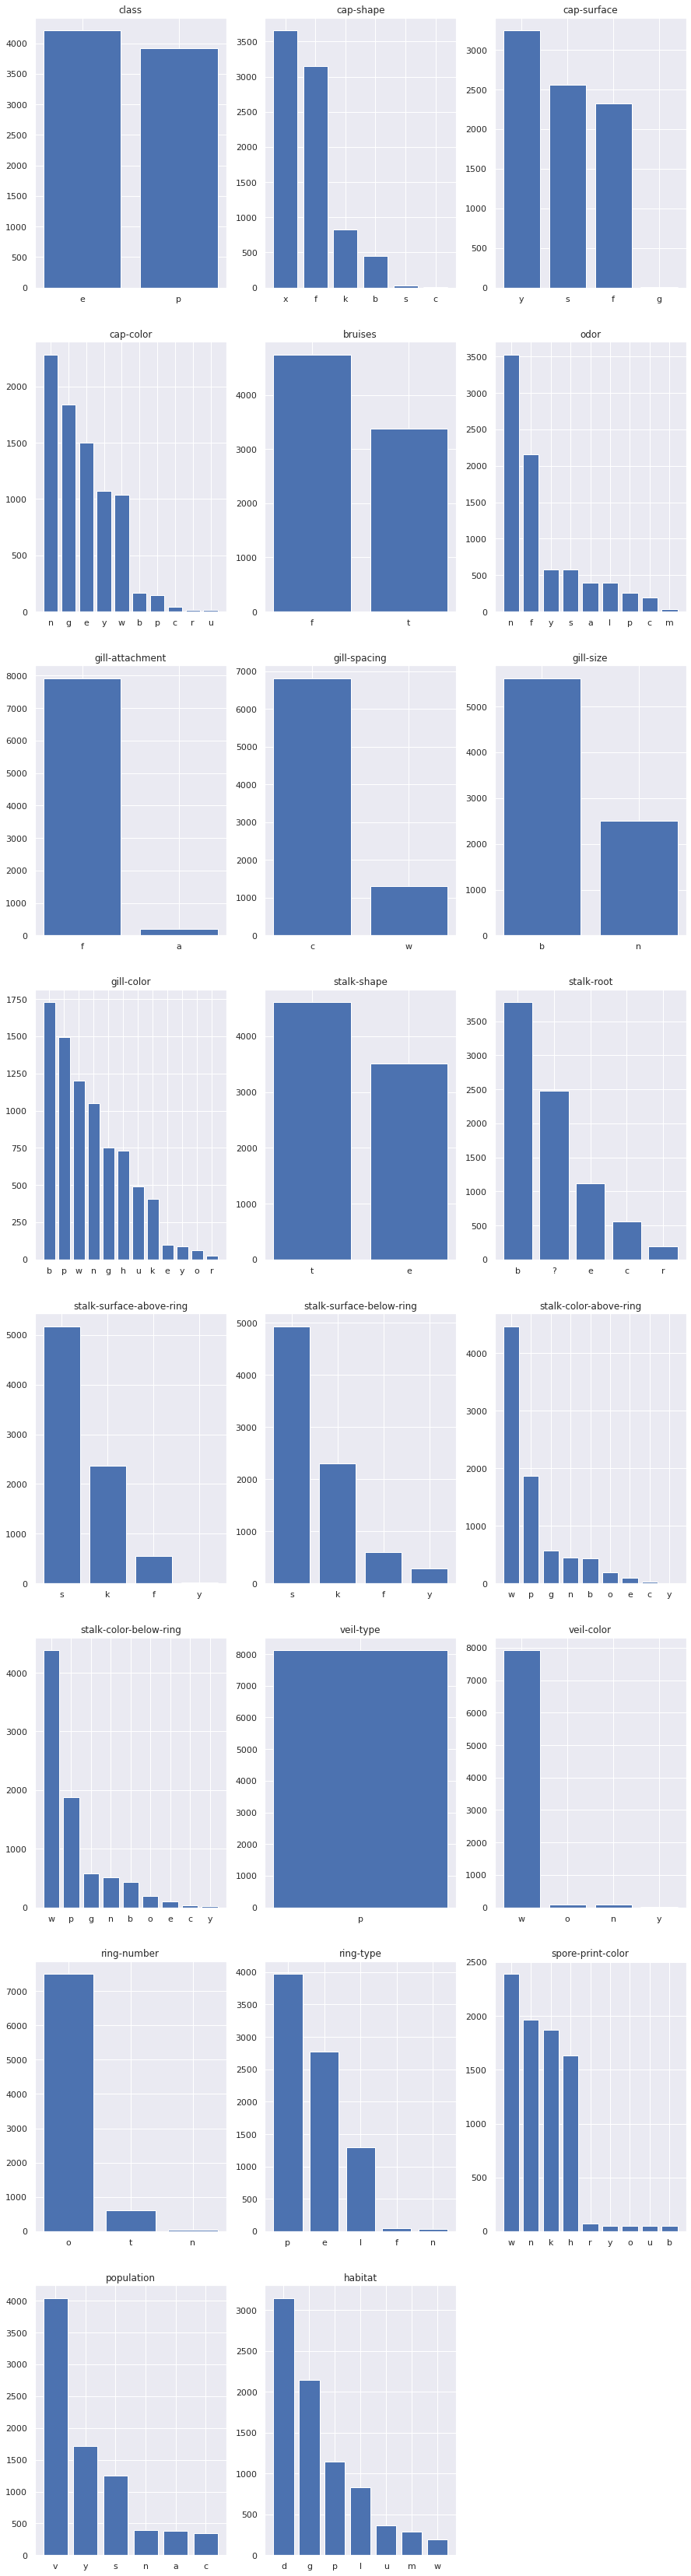

In [134]:
import pandas as pd
import matplotlib.pyplot as plt


categorical_features = df.columns
fig = plt.figure(figsize=(15,60))
for i, categorical_feature in enumerate(df[categorical_features]):
  ax = plt.subplot(8,3,i+1)
  inf = df[categorical_feature].value_counts()
  ax.bar(inf.index,inf.values)
  plt.title(categorical_feature)

stalk-root, veil-type, veil-color 


Concerning attribute stalk-root, we can see that about 2500 instances correspond to missing data, as there isn´t enough information there isn´t the possibility to fill missing data and as there are so many instances with no value it is best to delete this attribute. 

Regarding to veil-type, veil-color and ring-number  attribute, almost all of the instances are listed in the same category, which leads us to think that this attribute will not help much in the classification.In case of bad results in the classification, these attributes will be added again to check if they provide information or not, for the moment we will assume that they do not.





## Split data. 